# Evaluating Classifiers

## 1. Train/ Test on same data 
####  a. Overfitting
####  b. Accuracy not a good estimate for prediction of out of sample data.

## 2.  Train/Test split 
#### a. Better than train/test on same data.
#### b.  High variance because model accuracy depends on train/test split data. 

## 3. K fold cross validation (creates k train/test splits)
#### a. Better than train/test split but computationally more expensive.
#### b. Less variance, even better estimate of out of sample performance.

### Still train/test split is used in some cases because of it's speed.

# Model Evaluation Metric

### For Regression problems:Mean absolute error, Mean squared error, Root mean squared error
### For Classification problem: Classification accuracy

# Classification Accuracy

In [1]:
# Read the data into Dataframe
import pandas as pd
url  = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(url, header=None, names=col_names)

In [2]:
# Print first 5 rows of data
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Can we predict diabetes status of a patient given their health stats?

In [3]:
### Setting x and y.
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
x = pima[feature_cols]
y = pima.label


In [4]:
# Spliting into training and testing sets
from sklearn.cross_validation import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0)

In [5]:
## Training a logistic regression model
# Import the module
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model on training set
logreg.fit(x_train, y_train)

# Make predictions on test set
y_pred = logreg.predict(x_test)

# print y_pred
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0]


### Calculate accuracy

In [6]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.692708333333


## Null Accuracy


### Accuracy that can be obtained by always predicting the most frequent class.

In [7]:
## Calculating null accuracy for binary classification problems(0/1)
print(y_test.value_counts().head(1)/len(y_test))

0    0.677083
Name: label, dtype: float64


### That means our model just adds 2 percent to the accuracy. 

#### Classification accuracy is the easiest metric to understand.

#### But it does not tell you the underlying distribution. 

#### And it does not tell us "What types of error our classifier is making?"" 

# Confusion matrix



Table that describes the performance of a classification model.

In [8]:
# IMPORTANT True response values are first argument and predicted response values are second arguments
print(metrics.confusion_matrix(y_test, y_pred))

[[118  12]
 [ 47  15]]


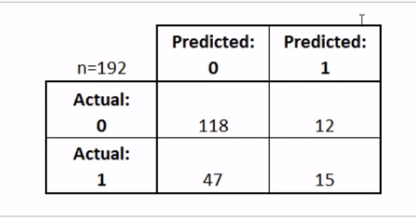

In [9]:
from IPython.display import Image
Image(filename='Capture.PNG')

#### Every observation is represented in exactly one box of confusion matrix

#### Confusion matrix is  2x2 coz there are two classes, if there were 5 classes it would be 5x5

### Basic Terms:
#### True Positive(TP):  We correctly predicted that they have diabetes. {bottom right}
#### True Negative(TN): We correctly predicted that they don't have diabetes. {top left}
#### False Positive(FP): We predicted diabetes but they don't have it. (TYPE I ERROR) {top right}
#### False Negative(FN):  We predicted no but they do have diabetes. (TYPE II ERROR) {bottom left}

### By convention : predicting 1 is positive, predicting 0 is negative. 

In [10]:
# Save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred)

TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

## Metrics computed from a Confusion matrix

### Classification Accuracy(accuracy_score) : Overall how correct is the model.

In [11]:
print((TP + TN)/(TP + TN + FP + FN))

0.692708333333


In [12]:
print(metrics.accuracy_score(y_test, y_pred))

0.692708333333


### Classification Error: How often is the classifier incorrect? A.K.A misclassification rate. 

 #### Classification Error/Misclassification rate =  1 -  Classification Accuracy 

In [13]:
print((FP + FN)/(TP + TN + FP + FN))

0.307291666667


In [14]:
print(1 - metrics.accuracy_score(y_test, y_pred))

0.307291666667


## Sensitivity(recall score): When the actual value is positive , how often the prediction is correct.

# learning trick: SENACPO

### Maximizing SENSITIVITY means minimizing FALSE NEGATIVES and vice versa.

In [20]:
print(TP/(TP + FN))

0.241935483871


In [21]:
print(metrics.recall_score(y_test, y_pred))

0.241935483871


## Specificity: When the actual value is negative, how often the prediction is correct. 

# learning trick: SPACNE

## Maximizing SPECIFICITY means minimizing FALSE POSITIVE and vice versa. 

In [17]:

specifi = (TN/(TN+FP))
print(specifi)

0.907692307692


### False Positive rate: When actual value is negative, how often the prediction is incorrect. 


In [18]:
print(1- specifi)

0.0923076923077


## Precision:
### When predicting positive? How often are we correct?

In [19]:
print(TP/(TP+FP))
print(metrics.precision_score(y_test, y_pred))

0.555555555556
0.555555555556


### Tips:
#### Always examine confusion metrics for model accuracy to get a detail picture.


## Choice of metrics depends on BUSINESS OBJECTIVE

## Spam filter: Focus on Specificity(TN/TN +FP)(how correctly we predict negatives) or Precision(how often are we correct while predicting positive) because spam in inbox is acceptable but useful mail in spam box is not. Meaning we'll have to be highly precise when saying it's a spam.  

## Fraudulent transaction detector: Focus on Sensitivity(TP/(TP+FN)) (how often we correctly predict positives) i.e. minimizing false negatives.  Because  False positives(where normal transactions tagged fraud are acceptable) but False negatives(where fraudulent transactions are tagged normal are not acceptable coz it results in loss of money). 

# Adjusting classification threshold 

In [22]:
## Printing first 10 predictions
logreg.predict(x_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [24]:
## Printing probabilities of the two classes for first 10 predictions
logreg.predict_proba(x_test)[0:10, :]

array([[ 0.63247571,  0.36752429],
       [ 0.71643656,  0.28356344],
       [ 0.71104114,  0.28895886],
       [ 0.5858938 ,  0.4141062 ],
       [ 0.84103973,  0.15896027],
       [ 0.82934844,  0.17065156],
       [ 0.50110974,  0.49889026],
       [ 0.48658459,  0.51341541],
       [ 0.72321388,  0.27678612],
       [ 0.32810562,  0.67189438]])

In [25]:
## Printing probabilities for class 1 for first 10 predictions
logreg.predict_proba(x_test)[0:10, 1]

array([ 0.36752429,  0.28356344,  0.28895886,  0.4141062 ,  0.15896027,
        0.17065156,  0.49889026,  0.51341541,  0.27678612,  0.67189438])

In [28]:
## Store the predicted probabilities
y_pred_prob = logreg.predict_proba(x_test)[:, 1]

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

In [33]:
plt.rcParams['font.size'] = 14

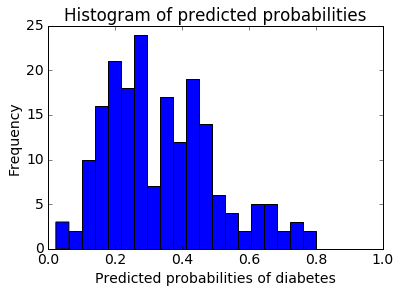

In [36]:
plt.hist(y_pred_prob, bins=10)
plt.xlim(0,1)
plt.title("Histogram of predicted probabilities")
plt.xlabel("Predicted probabilities of diabetes")
plt.ylabel("Frequency")

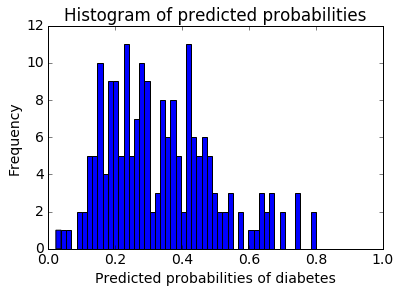

In [37]:
plt.hist(y_pred_prob, bins=50)
plt.xlim(0,1)
plt.title("Histogram of predicted probabilities")
plt.xlabel("Predicted probabilities of diabetes")
plt.ylabel("Frequency")

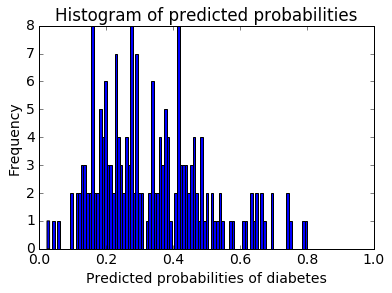

In [38]:
plt.hist(y_pred_prob, bins=100)
plt.xlim(0,1)
plt.title("Histogram of predicted probabilities")
plt.xlabel("Predicted probabilities of diabetes")
plt.ylabel("Frequency")

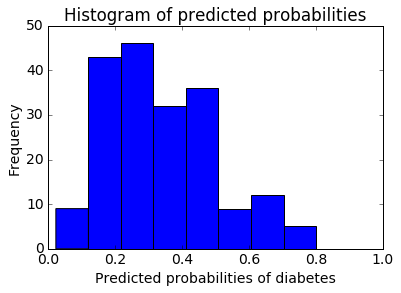

In [39]:
plt.hist(y_pred_prob, bins=8)
plt.xlim(0,1)
plt.title("Histogram of predicted probabilities")
plt.xlabel("Predicted probabilities of diabetes")
plt.ylabel("Frequency")

## DECREASE THRESHOLD  to INCREASE SENSITIVITY of classifier

EXAMPLE: Metal detector case

Predicts Yes or No depending on the threshold set, if more metal found than the threshold then Yes else No. Decreasing the threshold will cause more sensitivity towards yes and we'll more of yes. 

Similarly in our diabetes case if threshold probability is less we'll see more sesisitivity towards positive predictions. 

In [40]:
## Predict diabetes if predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_prob, 0.3)[0]

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [41]:
print(y_pred_class)

[ 1.  0.  0.  1.  0.  0.  1.  1.  0.  1.  1.  1.  1.  0.  1.  0.  1.  0.
  1.  1.  1.  1.  0.  1.  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  0.  1.
  1.  0.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.  1.  0.  1.  0.  1.  1.
  1.  0.  0.  1.  0.  0.  1.  1.  0.  0.  0.  1.  1.  0.  1.  1.  0.  0.
  0.  1.  1.  0.  1.  1.  0.  1.  1.  1.  0.  0.  1.  1.  0.  1.  1.  1.
  0.  0.  0.  0.  1.  0.  1.  1.  1.  1.  1.  0.  1.  0.  1.  1.  0.  0.
  0.  0.  0.  1.  1.  0.  1.  1.  0.  0.  0.  1.  1.  1.  1.  1.  0.  0.
  1.  1.  1.  0.  0.  0.  0.  1.  1.  1.  0.  1.  0.  0.  0.  1.  0.  1.
  1.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.  0.  1.  0.  1.  1.  1.  1.
  0.  0.  1.  0.  1.  0.  0.  0.  0.  1.  0.  1.  1.  0.  1.  1.  0.  0.
  1.  1.  1.  1.  0.  0.  1.  0.  0.  0.  0.  0.]


In [42]:
print(y_pred_prob[0:10])
print(y_pred_class[0:10])

[ 0.36752429  0.28356344  0.28895886  0.4141062   0.15896027  0.17065156
  0.49889026  0.51341541  0.27678612  0.67189438]
[ 1.  0.  0.  1.  0.  0.  1.  1.  0.  1.]


In [44]:
# print previous confusion matrix (default threshold = 0.5)
print(confusion)

[[118  12]
 [ 47  15]]


In [46]:
# Print new confusion matrix with new threshold of 0.3
print(metrics.confusion_matrix(y_test, y_pred_class))

[[80 50]
 [16 46]]


In [47]:
sensi_prev = (15/(15+47))
sensi_new = (46/(46+16))

In [48]:
print(sensi_prev)
print(sensi_new)

0.24193548387096775
0.7419354838709677


In [49]:
# Specificities

oldspec = 118/(118+12)
newspec = 80/(80+50)

In [50]:
print(oldspec, newspec)

0.9076923076923077 0.6153846153846154


## Conclusion 


### Threshold of 0.5 is default for binary classification problem. 

### Sensitivity and Specificity have inverse relation.

### Adjusting threshold is the last resort. ALWAYS FOCUS ON BETTER MODEL AND BETTER ACCURACY. 

# ROC curves and AREA UNDER CURVE (AUC) 

## ROC curve shows the effect of various threshold values on specificities and sensitivies.


In [51]:
### IMPORTANT : First argument is true values and second is predicted probabilities values.  

In [52]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

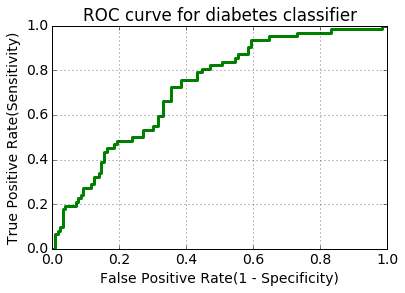

In [69]:
plt.plot(fpr, tpr , 'g-', linewidth = 3)
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.grid(True)


In [70]:
## Define a function that takes threshold and calculates sensitivity and specificity.
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:',1 -  fpr[thresholds > threshold][-1])

In [71]:
evaluate_threshold(0.5)

Sensitivity: 0.241935483871
Specificity: 0.907692307692


In [74]:
print(thresholds, thresholds > 0.4, tpr[thresholds > 0.4])

[ 1.80071498  0.80071498  0.74087965  0.69633712  0.69606825  0.67189438
  0.66716947  0.6645454   0.63230508  0.61736228  0.61111541  0.54263427
  0.54124529  0.53564034  0.52224649  0.51498521  0.51341541  0.50169902
  0.49325079  0.48716526  0.48715682  0.47865069  0.47049703  0.46500093
  0.46376224  0.46352874  0.45467041  0.45101363  0.44080614  0.43928953
  0.43350689  0.42654231  0.42460858  0.42098599  0.41744473  0.41413913
  0.4141062   0.38816583  0.38409318  0.3778741   0.37611662  0.36961151
  0.36488735  0.36050235  0.3484593   0.34099223  0.33519541  0.30918161
  0.29969894  0.28895886  0.28881041  0.28333693  0.27954552  0.27678612
  0.27580041  0.27022911  0.26957602  0.2531671   0.24919104  0.24880596
  0.24691412  0.23738524  0.23216721  0.23162338  0.23014102  0.21324812
  0.21320525  0.19103515  0.18922131  0.16122494  0.16036979  0.09743077
  0.05685904  0.02365251] [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True 

# AUC (area under the ROC curve): Higher the value better the classifier. 
#### Often used as single number performance measure of a classifier.
#### Very useful when there is HIGH CLASS IMBALANCE (one class dominates) unlike classification accuracy.. 


In [78]:
### IMPORTANT first argument is true values and second is prediction probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.724565756824


## Using AUC for cross validation

In [80]:
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg, x, y, cv = 10, scoring = 'roc_auc').mean()

0.73782336182336183